In [3]:
import pandas as pd
import numpy as np
import sklearn

In [4]:
df=pd.read_csv('../data/weather_report.csv')

In [5]:
t=pd.DataFrame(df['PM2.5'],index=df.index,columns=['PM2.5'])
def f(x):return float(x) if x!='None' else 0
t['PM2.5'].apply(f)
t['PM2.5'].replace('None',0,inplace=True)
t['PM2.5']=t['PM2.5'].astype(float)

In [6]:
t['PM2.5'].dtype

dtype('float64')

In [7]:
pd.to_numeric(t['PM2.5'])

0       99.25
1       55.64
2       71.49
3       75.06
4       73.29
        ...  
1737    16.01
1738    12.82
1739    14.93
1740    17.53
1741    16.87
Name: PM2.5, Length: 1742, dtype: float64

<Axes: >

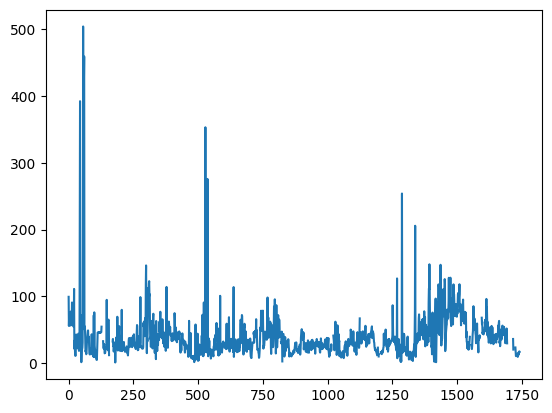

In [8]:
t['PM2.5'].plot()

In [9]:
def df_to_x_y(df,window_size=5):
    df_as_np=df.to_numpy()
    x,y=[],[]
    for i in range(len(df_as_np)-window_size):
        row=[[a] for a in df_as_np[i:i+5]]
        x.append(row)
        label=df_as_np[i+5]
        y.append(label)
    return np.array(x),np.array(y)

In [10]:
x=pd.DataFrame(df['PM2.5'],index=df.index,columns=['PM2.5'])

In [11]:
def f(x):return None if x=='None' else float(x)
x['PM2.5']=x['PM2.5'].apply(f)

In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1650 non-null   float64
dtypes: float64(1)
memory usage: 13.7 KB


In [13]:
x_nn=x[x['PM2.5'].notnull()]

In [14]:
x_nn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1650 entries, 0 to 1741
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1650 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [15]:
X,y=df_to_x_y(x_nn['PM2.5'],5)

In [16]:
X,y

(array([[[99.25],
         [55.64],
         [71.49],
         [75.06],
         [73.29]],
 
        [[55.64],
         [71.49],
         [75.06],
         [73.29],
         [67.1 ]],
 
        [[71.49],
         [75.06],
         [73.29],
         [67.1 ],
         [56.17]],
 
        ...,
 
        [[ 9.25],
         [10.49],
         [14.35],
         [16.01],
         [12.82]],
 
        [[10.49],
         [14.35],
         [16.01],
         [12.82],
         [14.93]],
 
        [[14.35],
         [16.01],
         [12.82],
         [14.93],
         [17.53]]]),
 array([67.1 , 56.17, 66.49, ..., 14.93, 17.53, 16.87]))

In [17]:
y.shape,X.shape

((1645,), (1645, 5, 1))

In [18]:
x_train,y_train=X[:900],y[:900]
x_val,y_val=X[900:1000],y[900:1000]
x_test,y_test=X[1000:],y[1000:]
x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape

((900, 5, 1), (900,), (100, 5, 1), (100,), (645, 5, 1), (645,))

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [20]:
model=Sequential()

In [21]:
model.add(InputLayer((5,1)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 128)               33792     
 al)                                                             
                                                                 
 dense (Dense)               (None, 8)                 1032      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 34833 (136.07 KB)
Trainable params: 34833 (136.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [23]:
model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Epoch 1/10

29/29 [==============================] - 4s 24ms/step - loss: 2632.7258 - root_mean_squared_error: 51.3101 - val_loss: 759.3039 - val_root_mean_squared_error: 27.5555
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 2594.2097 - root_mean_squared_error: 50.9334 - val_loss: 722.6398 - val_root_mean_squared_error: 26.8820
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 2546.4114 - root_mean_squared_error: 50.4620 - val_loss: 682.9009 - val_root_mean_squared_error: 26.1324
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 2499.9753 - root_mean_squared_error: 49.9998 - val_loss: 646.7198 - val_root_mean_squared_error: 25.4307
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 2453.2698 - root_mean_squared_error: 49.5305 - val_loss: 608.3370 - val_root_mean_squared_error: 24.6645
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 2402.2754 - root_mean_squared_error: 49.0

In [24]:
y_pred=model.predict(x_train).flatten()
df1=pd.DataFrame(data={'Prediction':y_pred,'Actual':y_train})
df1

29/29 [==============================] - 1s 1ms/step


,Prediction,Actual
0,7.219171,67.10
1,7.617427,56.17
2,7.720509,66.49
3,7.567062,77.11
4,7.405032,66.07
...,...,...
895,12.162374,20.78
896,12.464338,23.64
897,12.620053,26.23
898,12.226006,31.96
